In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import joblib
from sklearn.preprocessing import LabelEncoder

In [65]:
data = pd.read_csv("data - Copy.csv")
data.dropna()
data.head()

,Humidity,Temperature,Status
0,69.26,25.68,Wet
1,57.05,34.49,Dry
2,50.33,30.50,Dry
3,58.52,29.99,Wet
4,53.22,31.22,Dry


In [66]:
data.shape

(500, 3)

In [67]:
factor = pd.factorize(data['Status'])
data['Status'] = factor[0]
definitions = factor[1]
data.dropna()
print(data.head())
print(definitions)

   Humidity  Temperature  Status
0     69.26        25.68       0
1     57.05        34.49       1
2     50.33        30.50       1
3     58.52        29.99       0
4     53.22        31.22       1
Index(['Wet', 'Dry'], dtype='object')


In [68]:
X = data.iloc[:, 0:2].values
y = data.iloc[:, 2].values

In [69]:
X[:5,:]

array([[69.26, 25.68],
       [57.05, 34.49],
       [50.33, 30.5 ],
       [58.52, 29.99],
       [53.22, 31.22]])

In [70]:
y[:5]

array([0, 1, 1, 0, 1], dtype=int64)

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [72]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Using Random Forest Classifier

In [73]:
classifier_rfc = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier_rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=42)

In [74]:
y_pred_rfc = classifier_rfc.predict(X_test)

In [75]:
reversefactor = dict(zip(range(2),definitions))
y_test_labels = np.vectorize(reversefactor.get)(y_test)
y_pred_rfc = np.vectorize(reversefactor.get)(y_pred_rfc)

In [76]:
print(pd.crosstab(y_test_labels, y_pred_rfc, rownames=['True Value'], colnames=['Predicted Value']))

Predicted Value  Dry  Wet
True Value               
Dry               59   11
Wet               13   42


In [77]:
confusion_matrix(y_test_labels, y_pred_rfc)

array([[59, 11],
       [13, 42]], dtype=int64)

In [78]:
101/125

0.808

# Using Logistic Regression


In [79]:
classifier_log = LogisticRegression()
classifier_log.fit(X_train, y_train)

LogisticRegression()

In [80]:
y_pred_log = classifier_log.predict(X_test)

In [81]:
y_pred_log = np.vectorize(reversefactor.get)(y_pred_log)

In [82]:
confusion_matrix(y_test_labels, y_pred_log)

array([[47, 23],
       [15, 40]], dtype=int64)

In [83]:
print(pd.crosstab(y_test_labels, y_pred_log, rownames=['True Value'], colnames=['Predicted Value']))

Predicted Value  Dry  Wet
True Value               
Dry               47   23
Wet               15   40


In [91]:
87/125

0.696

# Using KNN Classifier

In [84]:
classifier_knn = KNeighborsClassifier(n_neighbors = 4)
classifier_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [85]:
y_pred_knn = classifier_knn.predict(X_test)

In [86]:
y_pred_knn = np.vectorize(reversefactor.get)(y_pred_knn)

In [87]:
confusion_matrix(y_test_labels, y_pred_knn)

array([[54, 16],
       [10, 45]], dtype=int64)

In [88]:
print(pd.crosstab(y_test_labels, y_pred_knn, rownames=['True Value'], colnames=['Predicted Value']))

Predicted Value  Dry  Wet
True Value               
Dry               54   16
Wet               10   45


In [92]:
99/125

0.792

# ROC Analysis

In [95]:
from sklearn.metrics import roc_curve


pred_prob1 = classifier_log.predict_proba(X_test)
pred_prob2 = classifier_rfc.predict_proba(X_test)
pred_prob3 = classifier_knn.predict_proba(X_test)

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)



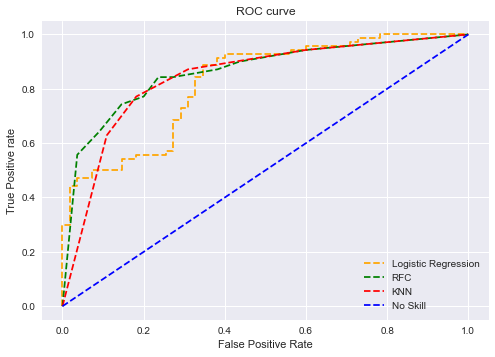

In [96]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='RFC')
plt.plot(fpr3, tpr3, linestyle='--',color='red', label='KNN')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue', label = 'No Skill')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='lower right')
plt.savefig('ROC',dpi=300)
plt.show();

In [97]:
from sklearn.metrics import roc_auc_score

print("ROC score of Logistic Regression: ",roc_auc_score(y_test, pred_prob1[:, 1]))
print("ROC score of Random Forest Classifier: ",roc_auc_score(y_test, pred_prob2[:, 1]))
print("ROC score of KNN: ", roc_auc_score(y_test, pred_prob3[:, 1]))

ROC score of Logistic Regression:  0.8218181818181819
ROC score of Random Forest Classifier:  0.8631168831168832
ROC score of KNN:  0.8422077922077922
